# Mulligan

In the "dangerous waters" treasure box, a Chart Fragment can be found through the research action. The Chart Fragment reads, *"Play before attempting an Explore endeavor in an empty sea space. You may re-roll all your dice after your roll."* How fascinating! How emboldened should you be heading out to sea with a Chart Fragment in hand?

In [1]:
%matplotlib inline

import itertools
import matplotlib
import matplotlib.pyplot
import numpy
import pandas
import scipy.misc
import scipy.special
import seaborn

In [2]:
# colormap for data visualizations
cmap = seaborn.cubehelix_palette(n_colors = 20, start = 0.8, rot = 0.75,
                                gamma = 0.3, hue = 2.0, dark = 0.005,
                                light = 0.95, reverse = True, as_cmap = True)

In [3]:
p_blank = 1.0/3

def prob_success(num_success, total_dice):
    if total_dice < num_success:
        p = 0.0
    else:
        p = (p_blank)**(total_dice-num_success) * \
        (1.0-p_blank)**num_success * \
        scipy.misc.comb(total_dice, num_success)
    return p

In [4]:
def prob_success_or_better(num_success, total_dice):
    if total_dice < num_success:
        p = 0.0
    else:
        rng_blank = numpy.arange(num_success, total_dice + 1)
        array_blank = [prob_success(n, total_dice) for n in rng_blank]
        p = numpy.sum(array_blank)
    return p

# SDP matrix
The probability of succeeding on the first roll **OR** (The probability of failing on the first roll **AND** succeeding on the second roll)

In [5]:
row_success = numpy.arange(1,31) # number of dice showing the blank face
col_dice = numpy.arange(1,31) # number of dice in the pool
sdp = numpy.zeros((numpy.size(row_success),numpy.size(col_dice)))
prob = [prob_success_or_better(*i) for i in itertools.product(row_success, col_dice)]
ind = [tuple(numpy.subtract(i,1)) for i in itertools.product(row_success, col_dice)]
for idx, val in enumerate(ind):
    sdp[val] = prob[idx]
    
sdp_1st_roll_success = sdp
sdp_2nd_roll_success = sdp
sdp_1st_roll_fail = 1-sdp
sdp_final = sdp_1st_roll_success + numpy.multiply(sdp_1st_roll_fail, sdp_2nd_roll_success)

In [6]:
# http://stackoverflow.com/questions/41474284/how-to-convert-a-matrix-into-column-array-with-pandas-python
sdp_dataframe = pandas.DataFrame(data = sdp_final, index = row_success, columns = col_dice)
sdp_dataframe_stack = sdp_dataframe.stack().reset_index().rename(
    columns = {
    "level_0" : "number_successes", 
    "level_1" : "number_dice_pool", 
    0 : "probability_GTE_to_number_successes"}
)

sdp_dataframe_15 = sdp_dataframe_stack.loc[(sdp_dataframe_stack["number_successes"] < 16) &
                                          (sdp_dataframe_stack["number_dice_pool"] < 16)]

sdp_pivot = sdp_dataframe_15.pivot("number_dice_pool", 
                                      "number_successes", 
                                      "probability_GTE_to_number_successes")
sdp_mask = numpy.logical_or(sdp_pivot > 0.999, numpy.triu(numpy.ones((15,15)), 1))

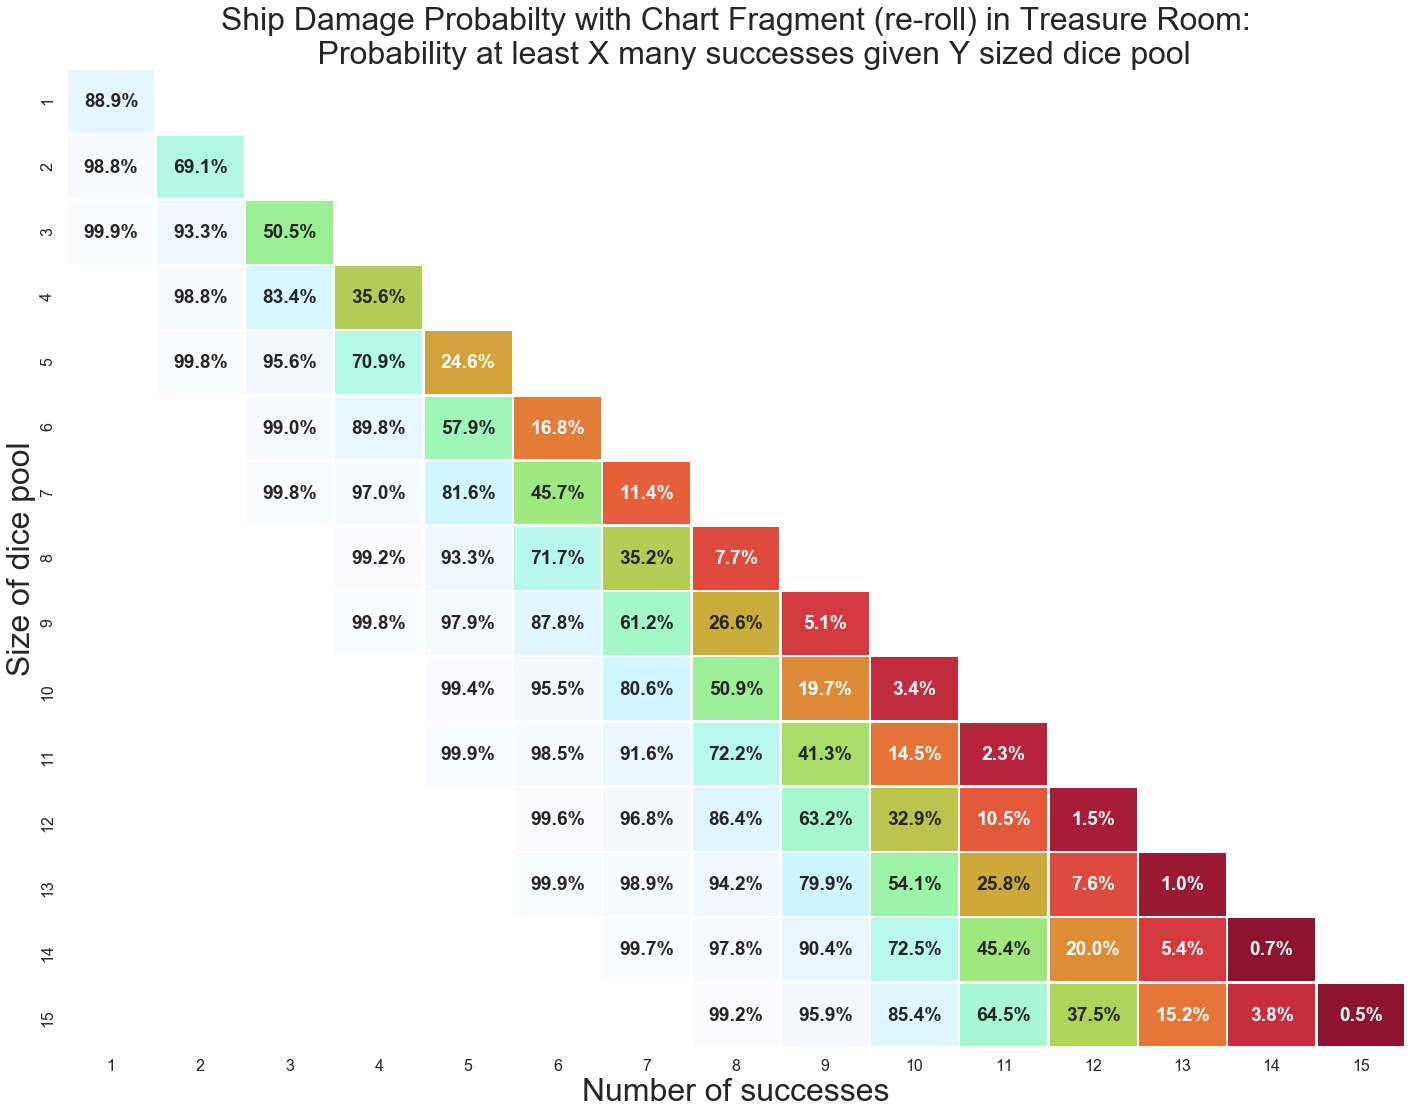

In [7]:
seaborn.set(style = "white")
seaborn.set_context("poster")
matplotlib.pyplot.figure(figsize=(24, 18))
ax = seaborn.heatmap(sdp_pivot, annot = True, cmap = cmap,
                     cbar = False, mask = sdp_mask, annot_kws = {"weight" : "extra bold"},
                     fmt = ".1%", linewidths = 1.5, vmin=0.0, 
                     vmax=1.0)
ax.set_title(
    """Ship Damage Probabilty with Chart Fragment (re-roll) in Treasure Room:
    Probability at least X many successes given Y sized dice pool""",
    fontsize=32)
ax.set_xlabel("Number of successes", fontsize=32)
ax.set_ylabel("Size of dice pool", fontsize=32)
fig = ax.get_figure()
fig.savefig("ship_damage_probabilities_1to15_reroll.pdf")
fig.savefig("ship_damage_probabilities_1to15_reroll.svg", format="svg", dpi=1200)

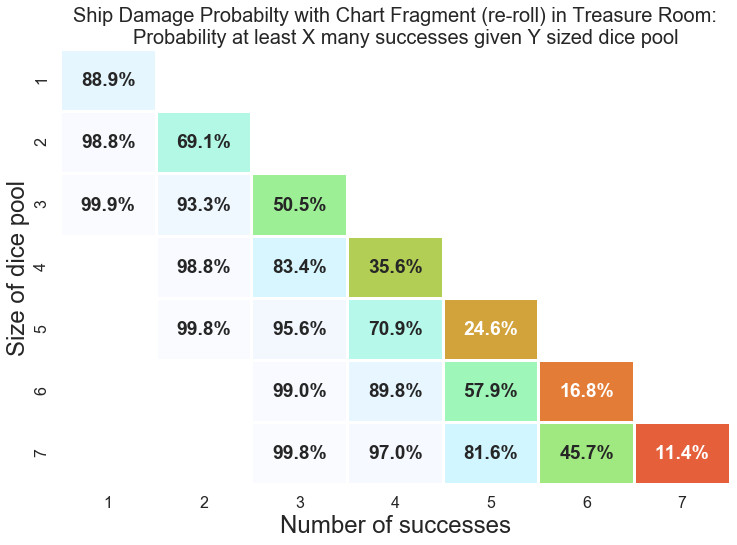

In [8]:
seaborn.set(style = "white")
seaborn.set_context("poster")
matplotlib.pyplot.figure(figsize=(12, 8))
sdp_dataframe_7 = sdp_dataframe_stack.loc[(sdp_dataframe_stack["number_successes"] < 8) &
                                          (sdp_dataframe_stack["number_dice_pool"] < 8)]

sdp_pivot_7 = sdp_dataframe_7.pivot("number_dice_pool", 
                                    "number_successes", 
                                    "probability_GTE_to_number_successes")

sdp_mask_7 = numpy.logical_or(sdp_pivot_7 > 0.999, numpy.triu(numpy.ones((7,7)), 1))

ax2 = seaborn.heatmap(sdp_pivot_7, annot = True, cmap = cmap,
                     cbar = False, mask = sdp_mask_7, annot_kws = {"weight" : "extra bold"},
                     fmt = ".1%", linewidths = 2.0, vmin=0.0, 
                     vmax=1.0)
ax2.set_title(
    """Ship Damage Probabilty with Chart Fragment (re-roll) in Treasure Room:
    Probability at least X many successes given Y sized dice pool""",
    fontsize=20)
ax2.set_xlabel("Number of successes", fontsize=24)
ax2.set_ylabel("Size of dice pool", fontsize=24)
fig = ax2.get_figure()
fig.savefig("ship_damage_probabilities_1to7_reroll.pdf")
fig.savefig("ship_damage_probabilities_1to7_reroll.svg", format="svg", dpi=1200)

Eventually, dice pools will exceed the number of dice provided, 15, in the game of SeaFall.

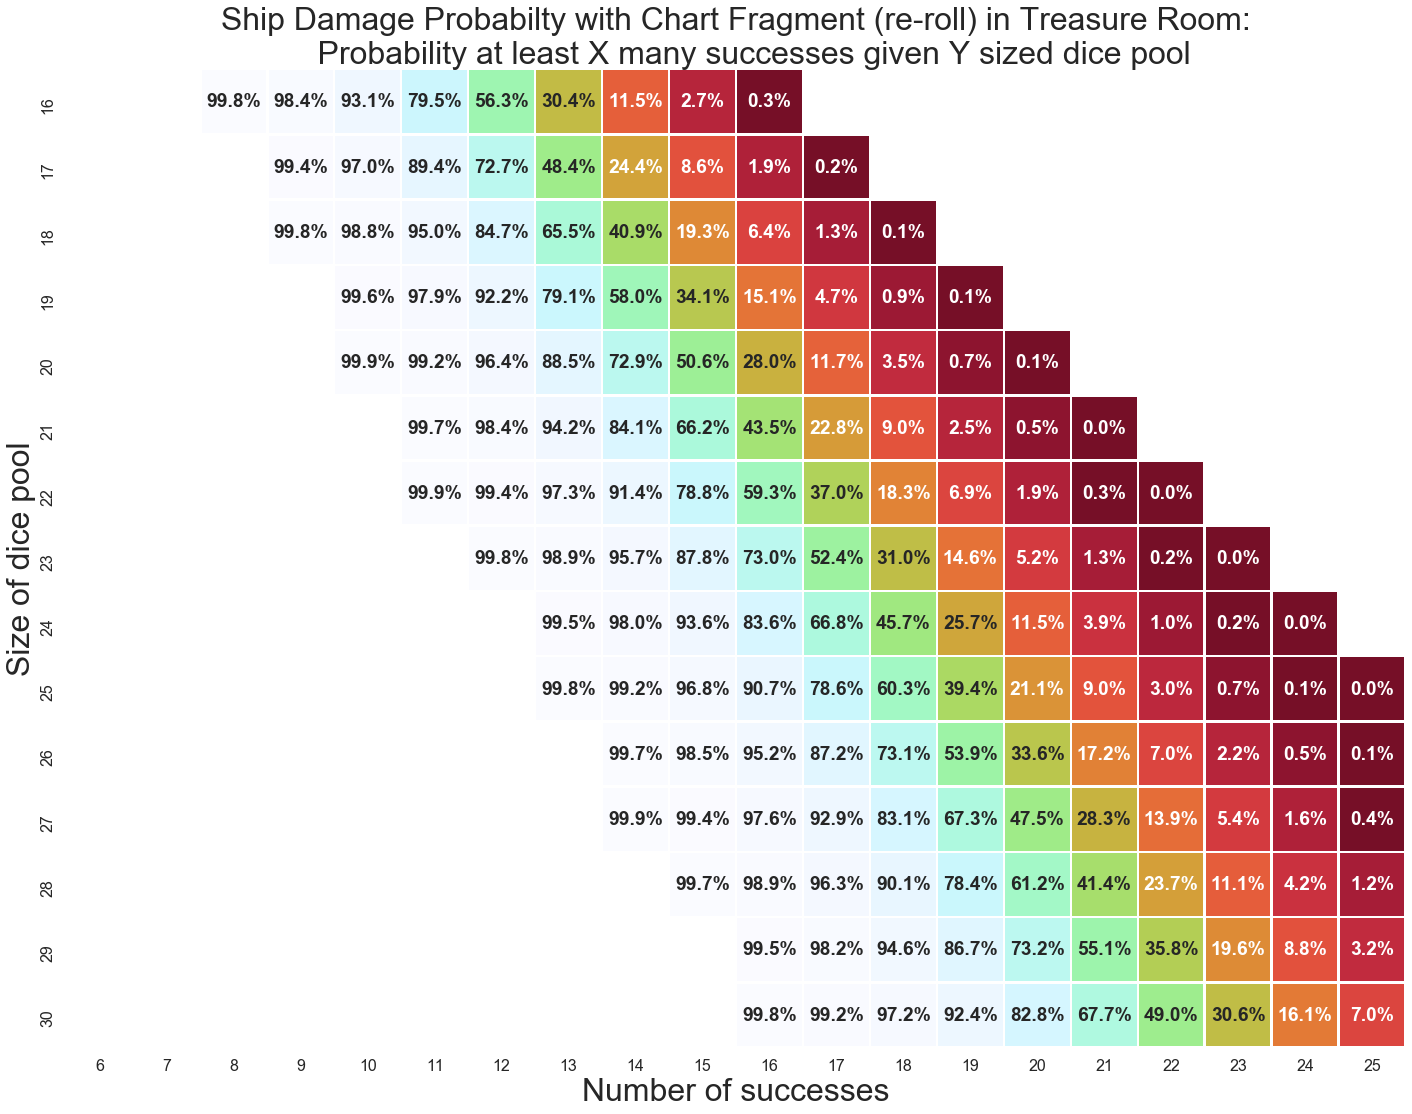

In [9]:
sdp_dataframe_30 = sdp_dataframe_stack.loc[(sdp_dataframe_stack["number_successes"] > 5) &
                                           (sdp_dataframe_stack["number_successes"] < 26) &
                                          (sdp_dataframe_stack["number_dice_pool"] > 15)]

sdp_pivot_30 = sdp_dataframe_30.pivot("number_dice_pool", 
                                    "number_successes", 
                                    "probability_GTE_to_number_successes")

sdp_mask_30 = numpy.logical_or(sdp_pivot_30 > 0.999, numpy.triu(numpy.ones((15,20)), 11))

seaborn.set(style = "white")
seaborn.set_context("poster")
matplotlib.pyplot.figure(figsize=(24, 18))
ax2 = seaborn.heatmap(sdp_pivot_30, annot = True, cmap = cmap,
                     cbar = False, mask = sdp_mask_30, annot_kws = {"weight" : "extra bold"},
                     fmt = ".1%", linewidths = 1.5, vmin=0.0, 
                     vmax=1.0)
ax2.set_title(
    """Ship Damage Probabilty with Chart Fragment (re-roll) in Treasure Room:
    Probability at least X many successes given Y sized dice pool""",
    fontsize=32)
ax2.set_xlabel("Number of successes", fontsize=32)
ax2.set_ylabel("Size of dice pool", fontsize=32)
fig = ax2.get_figure()
fig.savefig("ship_damage_probabilities_16to30_reroll.pdf")
fig.savefig("ship_damage_probabilities_16to30_reroll.svg", format="svg", dpi=1200)

# Strong success bonus and a re-roll!?!

In [10]:
p_blank = 1.0/3
p_major = 1.0/6

def prob_success_and_major(num_success, num_major, total_dice):
    if num_success + num_major > total_dice:
        p = 0.0
    else:    
        # https://en.wikipedia.org/wiki/Multiset#Counting_multisets
        p = (p_blank)**(total_dice-num_success-num_major) * \
        (p_major)**num_major * \
        (1-p_blank-p_major)**num_success * \
        scipy.misc.factorial(total_dice) / \
        (scipy.misc.factorial(num_success) * \
         scipy.misc.factorial(num_major) * \
         scipy.misc.factorial(total_dice - num_success - num_major)) 
    return p

def prob_success(num_success, total_dice):
    if total_dice < numpy.ceil(num_success/2.0):
        
        p = 0.0
        
    else:
        
        rng_success = numpy.arange(0, total_dice + 1)
        
        array_prob = []
        
        # x + 2y = n, x = success, y = major success, n = total number of successes
        for i in rng_success:
            
            x = i
            
            if num_success < x:
            
                array_prob.append(0.0)
                
                continue
            
            y = num_success - x
            
            if y % 2 == 0:
                
                y = y/2.0
                
                array_prob.append(prob_success_and_major(x, y, total_dice))
                
            else:
                
                array_prob.append(0.0)
            
        p = numpy.sum(array_prob)
        
    return p 

def prob_success_or_better(num_success, total_dice):
    if total_dice < numpy.ceil(num_success/2.0):
        p = 0.0
    else:
        rng_success = numpy.arange(num_success, 2*total_dice + 1)
        array_success = [prob_success(i, total_dice) for i in rng_success]
        p = numpy.sum(array_success)
    return p

p_blank = 1.0/3
p_major = 1.0/6

def prob_blank_and_major(num_blank, num_major, total_dice):
    if num_blank + num_major > total_dice:
        p = 0.0
    else:    
        # https://en.wikipedia.org/wiki/Multiset#Counting_multisets
        p = (p_blank)**num_blank * \
        (p_major)**num_major * \
        (1-p_blank-p_major)**(total_dice-num_blank-num_major) * \
        scipy.misc.factorial(total_dice) / \
        (scipy.misc.factorial(num_blank) * \
         scipy.misc.factorial(num_major) * \
         scipy.misc.factorial(total_dice - num_blank - num_major)) 
    return p

def prob_blank(num_blank, total_dice):
    if total_dice < num_blank:
        p = 0.0
    else:
        rng_blank = numpy.arange(num_blank, total_dice + 1)
        array_blank_and_major = [prob_blank_and_major(i, i-num_blank, total_dice) for i in numpy.arange(num_blank, 1 + numpy.floor((total_dice + num_blank)/2))]
        p = numpy.sum(array_blank_and_major)
    return p 

def prob_blank_or_worse(num_blank, total_dice):
    if total_dice < num_blank:
        p = 0.0
    else:
        rng_blank = numpy.arange(num_blank, total_dice + 1)
        array_blank = [prob_blank(i, total_dice) for i in rng_blank]
        p = numpy.sum(array_blank)
    return p

In [11]:
row_success = numpy.arange(1,41) # number successes in a dice pool
col_dice = numpy.arange(1,31) # number of dice in the pool
sdp = numpy.zeros((numpy.size(row_success),numpy.size(col_dice)))
prob = [prob_success_or_better(*i) for i in itertools.product(row_success, col_dice)]
ind = [tuple(numpy.subtract(i,1)) for i in itertools.product(row_success, col_dice)]
for idx, val in enumerate(ind):
    sdp[val] = prob[idx]
    
sdp_1st_roll_success = sdp
sdp_2nd_roll_success = sdp
sdp_1st_roll_fail = 1-sdp
sdp_final = sdp_1st_roll_success + numpy.multiply(sdp_1st_roll_fail, sdp_2nd_roll_success)
    
sdp_dataframe = pandas.DataFrame(data = sdp_final, index = row_success, columns = col_dice)
sdp_dataframe_stack = sdp_dataframe.stack().reset_index().rename(
    columns = {
        "level_0" : "number_success", 
        "level_1" : "number_dice_pool", 
        0 : "probability_GTE_to_number_success"})
#sdp_mask = numpy.triu(numpy.ones((15,15)), 1)

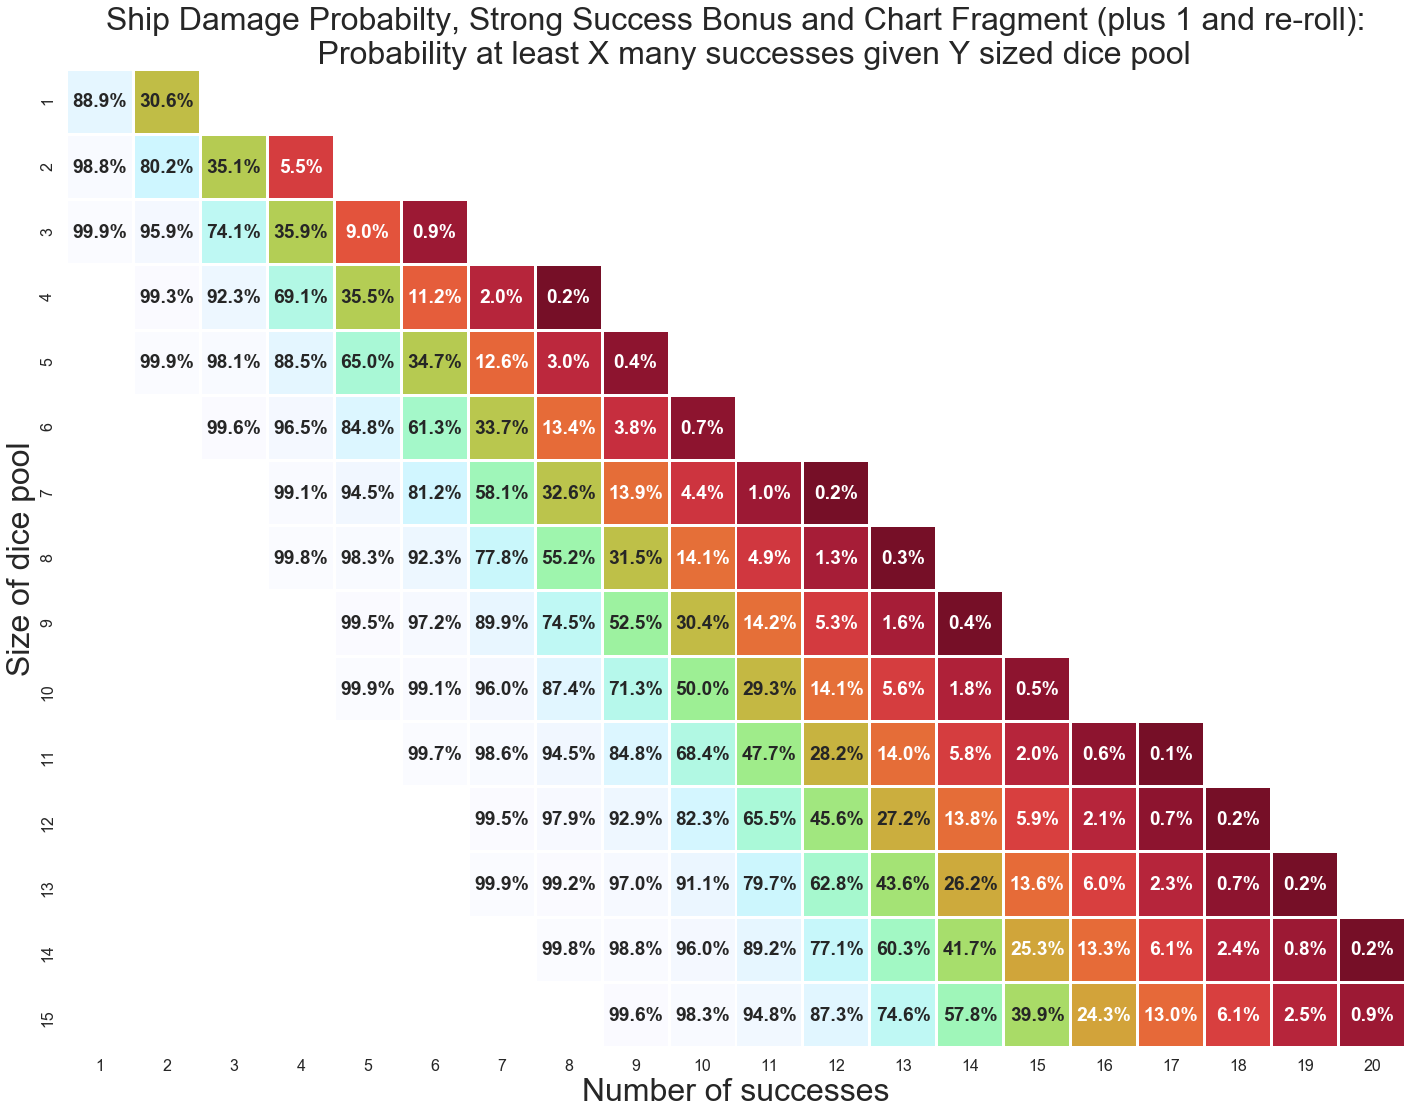

In [12]:
sdp_dataframe_15 = sdp_dataframe_stack.loc[(sdp_dataframe_stack["number_success"] < 21) &
                                           (sdp_dataframe_stack["number_dice_pool"] < 16)]

sdp_pivot = sdp_dataframe_15.pivot("number_dice_pool", 
                                      "number_success", 
                                      "probability_GTE_to_number_success")

sdp_mask = numpy.logical_or(sdp_pivot < 0.001, sdp_pivot > 0.999)
sdp_mask = sdp_mask.as_matrix()

seaborn.set(style = "white")
seaborn.set_context("poster")
matplotlib.pyplot.figure(figsize=(24, 18))
ax = seaborn.heatmap(sdp_pivot, annot = True, cmap = cmap,
                     cbar = False, mask = sdp_mask, annot_kws = {"weight" : "extra bold"},
                     fmt = ".1%", linewidths = 2, vmin=0.0, 
                     vmax=1.0)
ax.set_title(
    """Ship Damage Probabilty, Strong Success Bonus and Chart Fragment (plus 1 and re-roll):
    Probability at least X many successes given Y sized dice pool""",
    fontsize=32)
ax.set_xlabel("Number of successes", fontsize=32)
ax.set_ylabel("Size of dice pool", fontsize=32)
fig = ax.get_figure()
fig.savefig("ship_damage_probabilities_1to15_plus1_reroll.pdf")
fig.savefig("ship_damage_probabilities_1to15_plus1_reroll.svg", format="svg", dpi=1200)

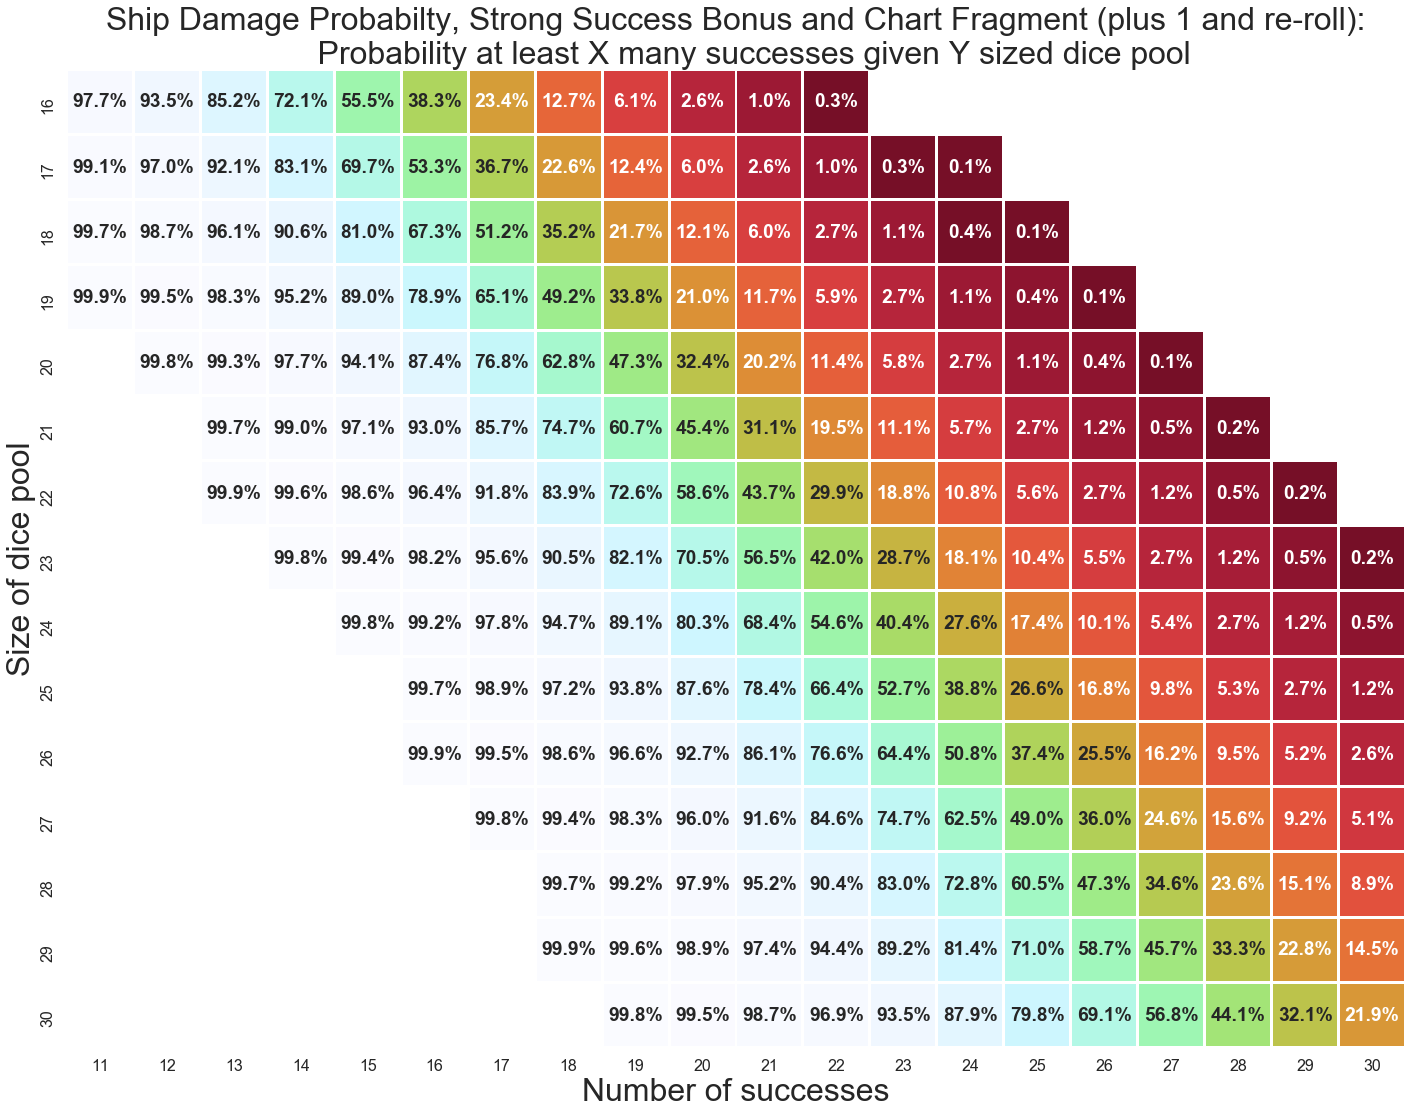

In [13]:
sdp_dataframe_30 = sdp_dataframe_stack.loc[(sdp_dataframe_stack["number_success"] > 10) &
                                           (sdp_dataframe_stack["number_success"] < 31) &
                                           (sdp_dataframe_stack["number_dice_pool"] >= 16)]

sdp_pivot = sdp_dataframe_30.pivot("number_dice_pool", 
                                      "number_success", 
                                      "probability_GTE_to_number_success")
sdp_mask = numpy.logical_or(sdp_pivot < 0.001, sdp_pivot > 0.999)
sdp_mask = sdp_mask.as_matrix()

seaborn.set(style = "white")
seaborn.set_context("poster")
matplotlib.pyplot.figure(figsize=(24, 18))
ax = seaborn.heatmap(sdp_pivot, annot = True, cmap = cmap,
                     cbar = False, mask = sdp_mask, annot_kws = {"weight" : "extra bold"},
                     fmt = ".1%", linewidths = 2, vmin=0.0, 
                     vmax=1.0)
ax.set_title(
    """Ship Damage Probabilty, Strong Success Bonus and Chart Fragment (plus 1 and re-roll):
    Probability at least X many successes given Y sized dice pool""",
    fontsize=32)
ax.set_xlabel("Number of successes", fontsize=32)
ax.set_ylabel("Size of dice pool", fontsize=32)
fig = ax.get_figure()
fig.savefig("ship_damage_probabilities_16to30_plus1_reroll.pdf")
fig.savefig("ship_damage_probabilities_16to30_plus1_reroll.svg", format="svg", dpi=1200)

The rows reflect the first roll and the number of dice in the dice pool. The columns reflect the second roll and the number of dice in the dice pool. Within each row, column position is a 3x3 grid that shows the probabilities across a relevant range of successes. Therefore each position in the table should read: The probability of greater than or equal to a number of successes on the first roll OR (failing on the first roll AND having greater than or equal to the same number of successes on the second roll).

## How would the size of the dice pool change between the first and second roll?

If a player has additional research cards they have the choice to play them before either the first or second roll. Some research cards change the size of the dice pool. For example, The Weathered Chart reads, *"Play before attempting an Explore endeavor in an empty sea space. Remove 2 dice from your pool before rolling. Add 2 successes to your endeavor."*

If you have a Chart Fragment and a Weathered Map, abstaining from using any research cards on the first roll gives you a chance to keep both if you find success. Using the Weathered Map on the first roll costs a research card, but increases the chances of retaining the Chart Fragment.

What happens if you have a Chart Fragment and more than one other research card that affects the dice pool. Should the cards be split between the two potential rolls? Should one roll be stacked?